In [267]:
import math
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

1. Построение распределений

Сгенерировать выборку с распределением Рэлэя ( https://ru.wikipedia.org/wiki/Распределение_Рэлея ) используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib.

In [468]:
sigma=3
class relay_gen(sps.rv_continuous):
    #def _rvs(self, x):
    #    sigma = 1
    #    return 1-np.exp(-x**2 / (2.*sigma**2))
        
    def _pdf(self, x):
        #sigma = 1
        return x*np.exp(-x**2 / (2.*sigma**2)) / sigma**2
                        
relay = relay_gen(a=0, name='relay')

sample = relay.rvs(size=1000)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [5.49493681 4.84517414 6.65730875 4.81293382 2.26320919 1.95887552
 2.9152965  0.32215558 3.96721581 5.95918012]
Выборочное среденее: 3.816
Выборочная дисперсия: 3.700


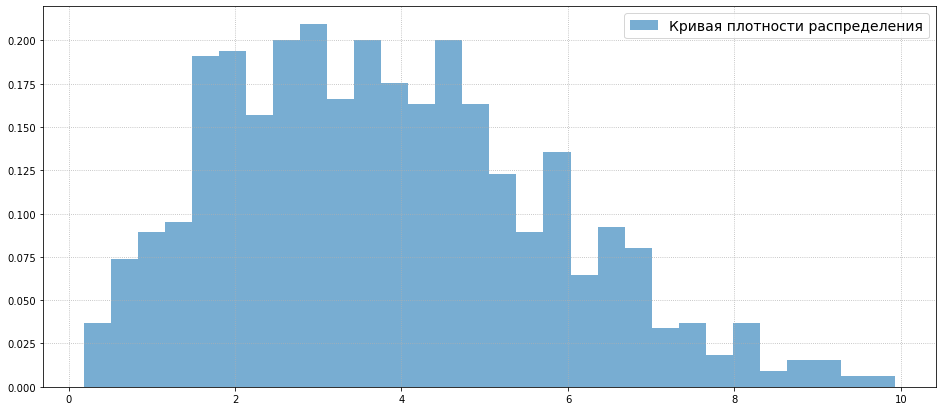

In [470]:
#plt.hist(sample, bins=20)
#plt.show()
pdf_sample=relay.pdf
grid = np.linspace(0, 10, 1000)  # сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=30, density=True,    #relay.pdf(grid)
         alpha=0.6, label='Кривая плотности распределения') 
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

2. Построение графика на по функции

Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график.

Выразив y через x, получим два уравнения:
y1=1/2*x**(2/3) + sqrt(1/4*x**(4/3)-x**2+1)
y2=1/2*x**(2/3) - sqrt(1/4*x**(4/3)-x**2+1)

In [611]:
x=np.arange(-1.139,1.139,0.0001)
y1=np.cbrt(x**2)/2.-np.sqrt(np.cbrt(x**4)/4.+1.-x**2)
y2=np.cbrt(x**2)/2.+np.sqrt(np.cbrt(x**4)/4.+1.-x**2)

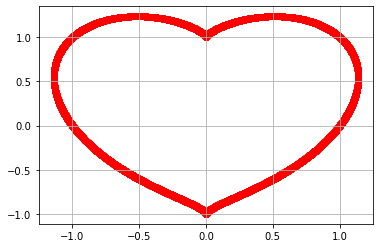

In [612]:
plt.scatter(x,y1, color='r')
plt.scatter(x,y2, color='r')
plt.grid()
plt.show()

3. Анализ зависимостей

Найти зависимости представленные в датасете приложенном к заданию.

In [223]:
age=[]
sex=[]
bmi=[]
children=[]
smoker=[]
region=[]
charges=[]

In [224]:
with open("./dataset_home.txt", mode='r') as file:
    for human in file.readlines():
        age.append(int(human.split(',')[0]))
        if(human.split(',')[1]=='male'):
            sex.append(1)
        else:
            sex.append(0)
        bmi.append(float(human.split(',')[2]))
        children.append(int(human.split(',')[3]))
        if(human.split(',')[4]=='yes'):
            smoker.append(1)
        else:
            smoker.append(0)
            
        if(human.split(',')[5]=='northwest'):
            region.append(0)
        elif(human.split(',')[5]=='northeast'):
            region.append(1)
        elif(human.split(',')[5]=='southwest'):
            region.append(2)
        elif(human.split(',')[5]=='southeast'):
            region.append(3)
        else:
            region.append(human.split(',')[5])
            
        charges.append(float(human.split(',')[6]))
    

In [226]:
age=np.array(age)
sex=np.array(sex)
bmi=np.array(bmi)
children=np.array(children)
smoker=np.array(smoker)
region=np.array(region)
charges=np.array(charges)

In [228]:
age.min(), age.max(), age.mean()

(18, 64, 38.37761194029851)

In [229]:
charges.min(), charges.max(), charges.mean()

(1131.5066, 62592.87309, 12899.874326014924)

График с зависимостями вида корреляция, зависимость (зависимость стоимости страховки от возраста)

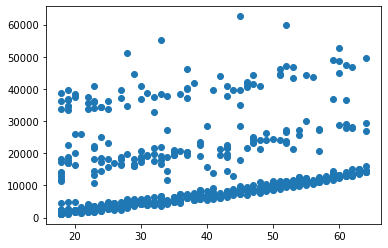

In [579]:
plt.scatter(age, charges)
plt.show()

График с зависимостью вида независимость (индекс веса от возраста)

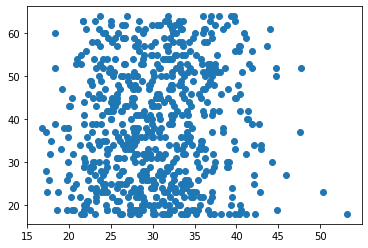

In [576]:
plt.scatter(bmi,age)
plt.show()

График с зависимостями вида кластеры, выбросы (стоимость страховки от индекса веса)

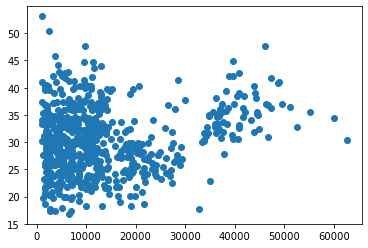

In [236]:
plt.scatter(charges,bmi)
plt.show()

График с зависимостью вида типичные значения (индекс веса от региона)

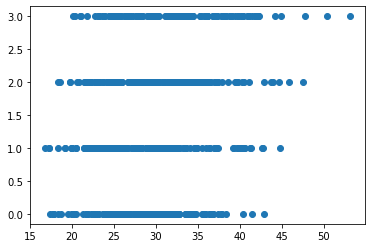

In [617]:
plt.scatter(bmi,region)
plt.show()